In [42]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [43]:
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')
teams_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructor_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')


In [44]:
teams.drop(columns=['url','nationality'], inplace=True)

In [45]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

In [46]:
races  = races[races['year'] == 2022]

In [47]:
teams_standings = teams_standings[teams_standings['raceId'].isin(races['raceId'])]

In [48]:
team_names = teams.set_index('constructorId')

In [49]:
teams_standings['Team'] = teams_standings['constructorId'].replace(team_names['name'])

In [51]:
race_names = races.set_index('raceId')['name'].to_dict()
teams_standings['Race Name'] = teams_standings['raceId'].replace(race_names)
teams_standings.reset_index(inplace=True)
teams_standings.sort_values(by='raceId')

,index,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team,Race Name
0,12706,28142,1074,9,0.0,10,10,0,Red Bull,Bahrain Grand Prix
1,12707,28141,1074,1,0.0,9,9,0,McLaren,Bahrain Grand Prix
2,12708,28140,1074,3,0.0,8,8,0,Williams,Bahrain Grand Prix
3,12709,28139,1074,117,0.0,7,7,0,Aston Martin,Bahrain Grand Prix
4,12710,28138,1074,213,4.0,6,6,0,AlphaTauri,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
94,12805,28237,1083,214,67.0,5,5,0,Alpine F1 Team,British Grand Prix
95,12806,28238,1083,213,27.0,7,7,0,AlphaTauri,British Grand Prix
96,12807,28239,1083,117,18.0,9,9,0,Aston Martin,British Grand Prix
97,12808,28240,1083,3,3.0,10,10,0,Williams,British Grand Prix


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


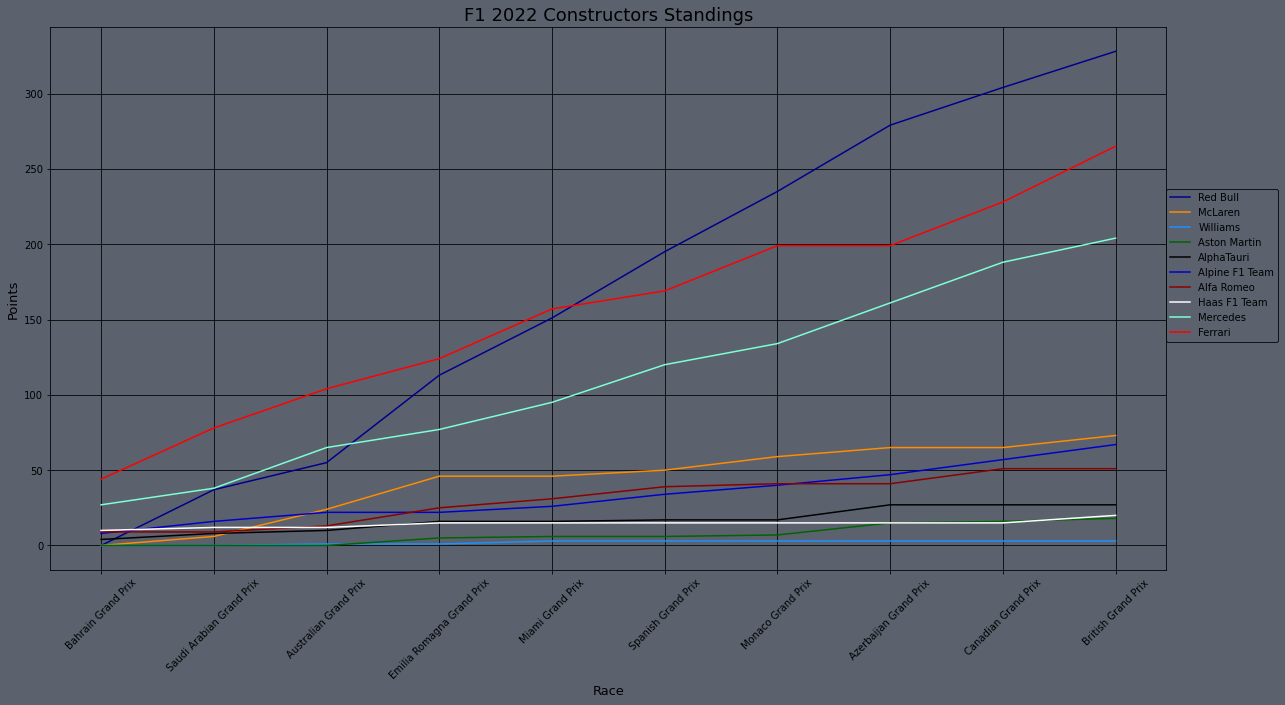

In [57]:

fig =  plt.figure( figsize=(20,10))

colors=['darkblue', 'darkorange', 'dodgerblue', 'darkgreen', 'black','mediumblue', 'darkred', 'white', 'aquamarine', 'red']


ax = sns.lineplot(teams_standings['Race Name'], teams_standings['points'],hue=teams_standings['Team'], palette=colors,markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Constructors Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)


plt.grid(color ='black')
plt.show()